In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from tsph import *

# Logistic Map Analysis

We study the Logistic map $x_{n+1} = r x_n (1 - x_n)$ for uniformly sampled values of $r\in [r_\text{min},r_\text{max}) \subseteq (0,4)$.

In [5]:
MIN_R, MAX_R, NUM_R, RANDOM_R, X0, TIME_SERIES_LENGTH = 3.5, 4.0, 1000, True, 0.2, 500
logistic_data = LogisticMapDataset(MIN_R, MAX_R, NUM_R, RANDOM_R, X0, TIME_SERIES_LENGTH)
r_values = logistic_data.r_values
time_series = logistic_data.trajectories

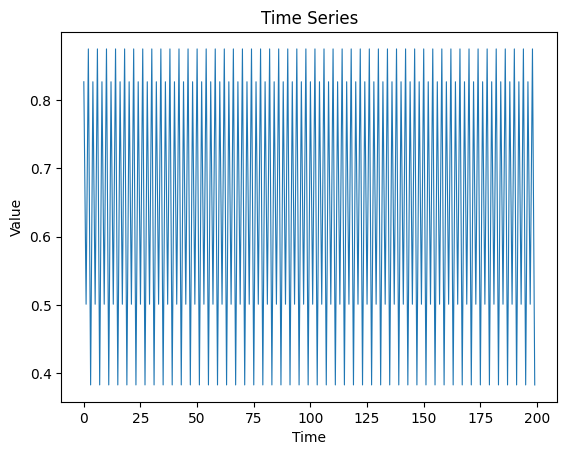

In [3]:
plot_time_series(time_series[0][:200], plot_kwargs=dict(lw=0.8))

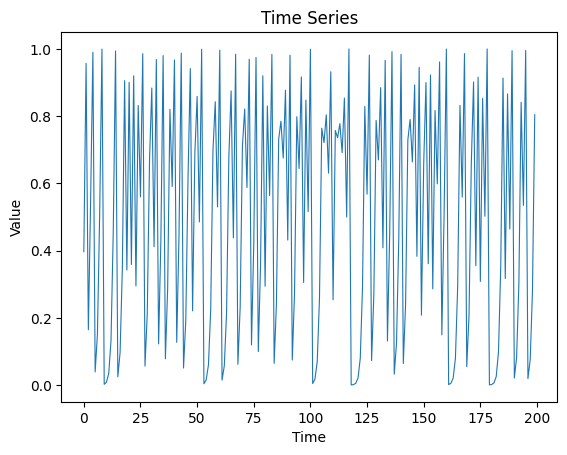

In [4]:
plot_time_series(time_series[-1][:200], plot_kwargs=dict(lw=0.8))

## Maximum Lyapunov Exponent of the Logistic Map

The Lyapunov exponent $\lambda\in\mathbb{R}$ is the analytical measure of rate of divergence of infinitessimally close initial conditions across the state space. For $\lambda > 0$ trajectories diverge and the dynamic state is considered chaotic.

In [6]:
lyapunov_exponents = logistic_data.lyapunov_exponents

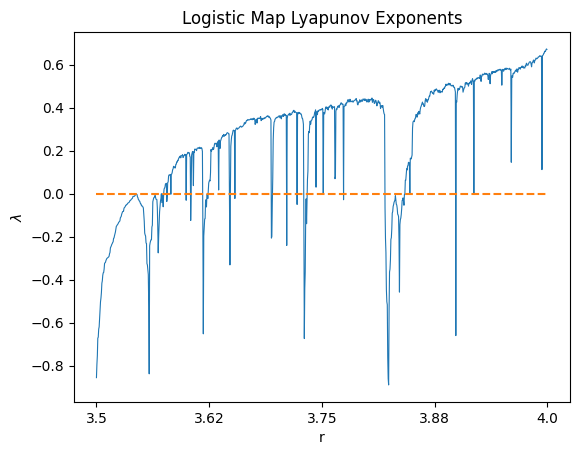

In [7]:
plt.plot(lyapunov_exponents, lw=0.8)
plt.plot([0, NUM_R], [0, 0], linestyle="dashed")
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("$\lambda$")
plt.title("Logistic Map Lyapunov Exponents")
plt.show()

## Divergences of Vectorisations of Persistent Homology

Motivated by the results in [^1] showing that the statistics of peaks and pits are a signal for chaos, we can compare the superlevel and sublevel set filtrations over a time series in various ways. In particular, any given representation of a sublevel filtration (such as its persistence diagram, its merge tree, or a vectorisation of these) can be compared with a representation of the corresponding superlevel filtration, using an appropriate distance function.

[^1]: Hasson, Uri, Jacopo Iacovacci, Ben Davis, Ryan Flanagan, Enzo Tagliazucchi, Helmut Laufs, and Lucas Lacasa. *‘A Combinatorial Framework to Quantify Peak/Pit Asymmetries in Complex Dynamics’*. **Scientific Reports 8**, no. 1 (December 2018): 3557. https://doi.org/10.1038/s41598-018-21785-0.


### Bottleneck Distance Between Sublevel and Superlevel Set Persistence Diagrams

The most basic measure, without vectorisations, just considers the bottleneck distance directly between the persistence diagrams. In all cases a superlevel set diagram satisfies $b > d$ for each point $(b, d)$. This means when comparing with a sublevel set diagram where we always have $b < d$ we would always find the bottleneck matching to be the maximum distance from either diagram to the diagonal $b=d$.

To avoid this degeneracy and compare the structures of the diagrams, we always flip the superlevel set persistence diagram so that it's points $(b, d)$ are mapped to $(d, b)$ in the plane. Then the two diagrams both satisfy that all their points lie above the diagonal $b=d$, and they can be compared directly using the distance function.

We do the same for all subsequent superlevel set filtration divergences.

In [ ]:
def compute_and_plot_divergences_and_lyapunov_relation(time_series, divergence_func):
    divergences = [divergence_func(ts) for ts in time_series]
    plt.plot(divergences, lw=0.8)
    plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
    plt.xlabel("r")
    plt.ylabel("Divergence $\Delta$")
    plt.title("Divergence for Logistic Map")
    plt.show()
    plt.scatter(lyapunov_exponents, divergences, s=5)
    # plt.plot([0, 0], [-0.05, 0.45], linestyle="dashed", c="orange")
    plt.xlabel("Lyapunov exponent $\lambda$")
    plt.ylabel("Divergence $\Delta$")
    plt.title("Divergence vs Lyapunov exponent")
    plt.show()
    pearsonr = stats.pearsonr(lyapunov_exponents, divergences)
    print("Pearson r-coefficient:", pearsonr)
    return divergences

In [ ]:
pd_stats_divergences = compute_and_plot_divergences_and_lyapunov_relation(time_series, pd_stats_divergence)

In [ ]:
pd_entropy_summary_divergences = compute_and_plot_divergences_and_lyapunov_relation(time_series, pd_entropy_summary_divergence)

In [ ]:
bottleneck_divergences = [bottleneck_divergence(ts) for ts in time_series]

In [ ]:
plt.plot(bottleneck_divergences, lw=0.8)
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("Bottleneck divergence $\Delta$")
plt.title("Bottleneck divergence for Logistic Map")
plt.show()

In [ ]:
plt.scatter(lyapunov_exponents, bottleneck_divergences, s=5)
plt.plot([0, 0], [-0.05, 0.45], linestyle="dashed", c="orange")
plt.xlabel("Lyapunov exponent $\lambda$")
plt.ylabel("Bottleneck divergence $\Delta$")
plt.title("Bottleneck divergence vs Lyapunov exponent")
plt.show()

In [ ]:
bottleneck_pearsonr = stats.pearsonr(lyapunov_exponents, bottleneck_divergences)
bottleneck_pearsonr

#### Bottleneck divergence summary

For the bottleneck distance on the pairs of diagrams, we see peaks in the super-vs-sub level divergence when the Lyapunov exponent is low. There is a negative correlation of 0.54, witnessed by the clustering of bottleneck divergences at lower values when $\lambda$ is high.  

### $p$-Wasserstein Distance Between Sublevel and Superlevel Set Persistence Diagrams

We now consider divergences based on the Wasserstein distance between the sublevel and $(d,b)$-flipped superlevel persistence diagrams.

#### The 1-Wasserstein case

In [ ]:
wasserstein_divergences_p1 = [wasserstein_divergence(ts, p=1.0) for ts in time_series]

In [ ]:
plt.plot(wasserstein_divergences_p1, lw=0.8)
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("1-Wasserstein divergence $\Delta$")
plt.title("1-Wasserstein divergence for Logistic Map")
plt.show()

In [ ]:
plt.scatter(lyapunov_exponents, wasserstein_divergences_p1, s=4)
plt.plot([0, 0], [-0.05, 0.75], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("1-Wasserstein divergence $\Delta$")
plt.title("1-Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [ ]:
wasserstein_p1_pearsonr = stats.pearsonr(lyapunov_exponents, wasserstein_divergences_p1)
wasserstein_p1_pearsonr

#### 1-Wasserstein divergence summary

For the $p=1$ Wasserstein distance on the pairs of diagrams, there is wide variance in the divergence over the $r$ values, with stability only in the larger intervals of stability for $\lambda$. There is a small correlation of 0.2, and the divergence values do not cluster for $\lambda > 0$. Indeed they spread out, meaning there is no signal in this divergence.  

#### The 2-Wasserstein case

In [ ]:
wasserstein_divergences_p2 = [wasserstein_divergence(ts, p=2.0) for ts in time_series]

In [ ]:
plt.plot(wasserstein_divergences_p2, lw=0.8)
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("2-Wasserstein divergence $\Delta$")
plt.title("2-Wasserstein divergence for Logistic Map")
plt.show()

In [ ]:
plt.scatter(lyapunov_exponents, wasserstein_divergences_p2, s=4)
plt.plot([0, 0], [-0.05, 0.45], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("2-Wasserstein divergence $\Delta$")
plt.title("2-Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [ ]:
wasserstein_p2_pearsonr = stats.pearsonr(lyapunov_exponents, wasserstein_divergences_p2)
wasserstein_p2_pearsonr

#### 2-Wasserstein divergence summary

For the $p=2$ Wasserstein distance $W_2$ on the pairs of diagrams, there is much clearer correlation of $-0.5$ between $\lambda$ and the diagram divergences. We see clustering in the $\lambda$ vs divergence scatter plot indicating a drop in divergence whenever the system is chaotic.

The pattern is similar to the bottleneck divergence, with a slightly lower correlation.

We can conjecture that the absolute value of the correlation of the $p$-Wasserstein divergence with $\lambda$ will increase as $p\to\infty$, reaching its peak at $W_\infty$, namely the bottleneck divergence.

### HVG Degree Statistics Divergence Between "Top" and "Bottom" HVGs

We now consider divergences based on the degree distributions of the "top" HVG, which corresponds to a sublevel set filtration, and the "bottom" HVG, which corresponds to a superlevel set filtration.

The authors of the peak/pit asymmetry paper cited above use the $L_1$ distance between degree distributions as their measure $\Delta\text{VGA}$ on HVGs, namely $\Delta\text{VGA} = \sum_k |P^\text{top}(k) - P^{bot}(k)|$.

We will consider the pointwise $L_1$, $L_2$, $L_\infty$ and the global Wasserstein distances between the distributions. Note that this Wasserstein distance is different from the persistence diagram Wasserstein distance, since it is an earth mover's distance on 1-d distributions.

#### The Wasserstein distance between 1d distributions case

In [ ]:
hvg_peak_pit_divergences = [hvg_peak_pit_divergence(ts, distance_func="wasserstein_distance_for_1d_distributions") for ts in time_series]

In [ ]:
plt.plot(hvg_peak_pit_divergences, lw=0.8)
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("Peak-pit Wasserstein divergence $\Delta$")
plt.title("Peak-pit Wasserstein divergence for Logistic Map")
plt.show()

In [ ]:
plt.scatter(lyapunov_exponents, hvg_peak_pit_divergences, s=4)
plt.plot([0, 0], [-0.0005, 0.0045], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("Peak-pit Wasserstein divergence $\Delta$")
plt.title("Peak-pit Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [ ]:
hvg_peak_pit_pearsonr = stats.pearsonr(lyapunov_exponents, hvg_peak_pit_divergences)
hvg_peak_pit_pearsonr

#### Wasserstein divergence summary

There is a significant strong positive correlation of 0.69 with this divergence and the Lyapunov $\lambda$ showing that combinatorial information is effective at picking out chaotic dynamics.

Note that the paper on peak/pit asymmetries cited above does **not** use the Wasserstein distance, and instead uses the $L_1$ distance between the distributions. A nonlinear correlation between between this latter metric and the Lyapunov exponent does not exist as we observe below. 

#### The $L_p$ distance between 1d distributions case

In [ ]:
hvg_peak_pit_divergences_l1 = [hvg_peak_pit_divergence(ts, distance_func="lp_dist", distance_params=dict(p=1)) for ts in time_series]
hvg_peak_pit_divergences_l2 = [hvg_peak_pit_divergence(ts, distance_func="lp_dist", distance_params=dict(p=2)) for ts in time_series]
hvg_peak_pit_divergences_linf = [hvg_peak_pit_divergence(ts, distance_func="lp_dist", distance_params=dict(p=np.inf)) for ts in time_series]

In [ ]:
plt.plot(hvg_peak_pit_divergences_l1, lw=0.8, label="$L_1$")
plt.plot(hvg_peak_pit_divergences_l2, lw=0.8, label="$L_2$")
plt.plot(hvg_peak_pit_divergences_linf, lw=0.8, label="$L_\infty$")
plt.xticks(ticks = np.arange(0, NUM_R + 1, NUM_R/4), labels = [round(r, 2) for r in np.arange(MIN_R, MAX_R + 0.001, (MAX_R-MIN_R)/4)])
plt.xlabel("r")
plt.ylabel("Peak-pit $L_p$ divergence $\Delta$")
plt.title("Peak-pit $L_p$ divergence for Logistic Map")
plt.legend()
plt.show()

In [ ]:
plt.scatter(lyapunov_exponents, hvg_peak_pit_divergences_l1, s=4, label="$L_1$")
plt.scatter(lyapunov_exponents, hvg_peak_pit_divergences_l2, s=4, label="$L_2$")
plt.scatter(lyapunov_exponents, hvg_peak_pit_divergences_linf, s=4, label="$L_\infty$")
plt.plot([0, 0], [-0.025, 0.825], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("Peak-pit $L_p$ divergence $\Delta$")
plt.title("Peak-pit $L_p$ divergence vs Lyapunov exponent")
plt.legend()
plt.show()

In [ ]:
hvg_peak_pit_pearsonr_l1 = stats.pearsonr(lyapunov_exponents, hvg_peak_pit_divergences_l1)
hvg_peak_pit_pearsonr_l2 = stats.pearsonr(lyapunov_exponents, hvg_peak_pit_divergences_l2)
hvg_peak_pit_pearsonr_linf = stats.pearsonr(lyapunov_exponents, hvg_peak_pit_divergences_linf)
print("L1:", hvg_peak_pit_pearsonr_l1)
print("L2:", hvg_peak_pit_pearsonr_l2)
print("Linf:", hvg_peak_pit_pearsonr_linf)

#### $L_p$ divergence summary for $p=1,2,\infty$

There is low correlation between the $L_p$ divergences of the degree distributions and the Lyapunov exponent $\lambda$ for the Logistic map. This is in contrast to the Wasserstein distance between the degree distributions above, which shows a strong correlation.

#### Correlation between HVG and persistence diagram values

To find out the extent to which "new" information is present in the persistence diagram divergences computed above, we can establish the correlation between the bottleneck divergence and the combinatorial divergence measure taken from the HVG.

In [ ]:
hvg_wasserstein_vs_persistence_bottleneck_pearsonr = stats.pearsonr(bottleneck_divergences, hvg_peak_pit_divergences)
hvg_l1_vs_persistence_bottleneck_pearsonr = stats.pearsonr(bottleneck_divergences, hvg_peak_pit_divergences_l1)
hvg_l2_vs_persistence_bottleneck_pearsonr = stats.pearsonr(bottleneck_divergences, hvg_peak_pit_divergences_l2)
hvg_linf_vs_persistence_bottleneck_pearsonr = stats.pearsonr(bottleneck_divergences, hvg_peak_pit_divergences_linf)
print("PD BOTTLENECK DIVERGENCE COMPARISON")
print("Wasserstein:", hvg_wasserstein_vs_persistence_bottleneck_pearsonr)
print("L1:", hvg_l1_vs_persistence_bottleneck_pearsonr)
print("L2:", hvg_l2_vs_persistence_bottleneck_pearsonr)
print("Linf:", hvg_linf_vs_persistence_bottleneck_pearsonr)

hvg_wasserstein_vs_persistence_wasserstein_p1_pearsonr = stats.pearsonr(wasserstein_divergences_p1, hvg_peak_pit_divergences)
hvg_l1_vs_persistence_wasserstein_p1_pearsonr = stats.pearsonr(wasserstein_divergences_p1, hvg_peak_pit_divergences_l1)
hvg_l2_vs_persistence_wasserstein_p1_pearsonr = stats.pearsonr(wasserstein_divergences_p1, hvg_peak_pit_divergences_l2)
hvg_linf_vs_persistence_wasserstein_p1_pearsonr = stats.pearsonr(wasserstein_divergences_p1, hvg_peak_pit_divergences_linf)
print("PD WASSERSTEIN L1 DIVERGENCE COMPARISON")
print("Wasserstein:", hvg_wasserstein_vs_persistence_wasserstein_p1_pearsonr)
print("L1:", hvg_l1_vs_persistence_wasserstein_p1_pearsonr)
print("L2:", hvg_l2_vs_persistence_wasserstein_p1_pearsonr)
print("Linf:", hvg_linf_vs_persistence_wasserstein_p1_pearsonr)

In [ ]:
plt.scatter(hvg_peak_pit_divergences, bottleneck_divergences, s=4)
plt.xlabel("HVG degree distribution Wasserstein divergence")
plt.ylabel("Persistence diagram bottleneck divergence")
plt.title("Comparing combinatorial with metric divergences: Bottleneck")
plt.show()

In [ ]:
plt.scatter(hvg_peak_pit_divergences, pd_entropy_summary_divergences, s=4)
plt.xlabel("HVG degree distribution Wasserstein divergence")
plt.ylabel("Persistence diagram bottleneck divergence")
plt.title("Comparing combinatorial with metric divergences: Entropy")
plt.show()

In [ ]:
plt.scatter(hvg_peak_pit_divergences, wasserstein_divergences_p1, s=4)
plt.xlabel("HVG degree distribution Wasserstein divergence")
plt.ylabel("Persistence diagram $W_1$ divergence")
plt.title("Comparing combinatorial with metric divergences: $W_1$")
plt.show()

We see low correlation between these two divergences, indicating that the persistence divergence captures substantial new information that is not available to the measure based on the combinatorics of HVGs through their degree distributions.

This indicates that combining these divergences as features in an ML pipeline is likely to improve discrimination between chaotic and non-chaotic dynamical systems.

### Predictions using the combinatorial and metric divergences

We can combine the Wasserstein, and optionally $L_p$, divergence for HVGs and the bottleneck divergence for PDs in a classification or regression.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold

In [ ]:
X = np.array(list(zip(pd_entropy_summary_divergences, hvg_peak_pit_divergences)))
# X = np.array(list(zip(bottleneck_divergences, wasserstein_divergences_p1, hvg_peak_pit_divergences, hvg_peak_pit_divergences_l1, hvg_peak_pit_divergences_l2, hvg_peak_pit_divergences_linf)))
# X = StandardScaler().fit_transform(X)
# X = X[:,:4]
# X = X[:,[1,3]]
# X = X[:,1].reshape(-1,1)
# X = X[:,1:]

In [ ]:
y_classification = lyapunov_exponents > 0
y_regression = lyapunov_exponents

In [ ]:
np.sum(y_classification), len(y_classification)

In [ ]:
model_classification = RandomForestClassifier(n_estimators=100)
model_regression = RandomForestRegressor(n_estimators=100)

In [ ]:
cv_classification = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
cv_regression = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)

In [ ]:
n_scores_classification = cross_val_score(model_classification, X, y_classification, scoring='accuracy', cv=cv_classification, n_jobs=-1, error_score='raise')
n_scores_regression = cross_val_score(model_regression, X, y_regression, scoring='neg_mean_absolute_error', cv=cv_regression, n_jobs=-1, error_score='raise')

In [ ]:
print('Classification accuracy: %.3f (%.3f)' % (np.mean(n_scores_classification), np.std(n_scores_classification)))
print('Regression MAE: %.3f (%.3f)' % (np.mean(n_scores_regression), np.std(n_scores_regression)))

What are the relative importances of the features: bottleneck divergence, and HVG degree distribution divergence? Note that this is less granular than the permutation based feature importance values. See [Sklearn docs](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) on this.

In [ ]:
model_classification.fit(X, y_classification)
model_classification.feature_importances_

The bottleneck divergence is evaluated as the most important feature for model predictions.

A simple random forest classifier / regressor can achieve high accuracy and low mean absolute error respectively, using the combined features of the Wasserstein distance between the (combinatorial) distributions of top and bottom HVG degrees, and the bottleneck distance between the stable sublevel and superlevel persistence diagrams of the system trajectory.